# PREDICTING ADULT INCOME WITH MACHINE LEARNING

## INTRODUCTION
#### The data set contains information about the income of US citizens over a period of time,the task is to use machine learning to determine whether a person makes over 50k dollars a year 

#### Importing libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [32]:
# import data
df=pd.read_csv('adult.csv',low_memory=False)

In [33]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [71]:
# statistical information about data
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [34]:
# information about columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## UNIVARIATE ANALYSIS
#### Analysis of the INCOME column 

In [35]:
# count of values in the income column
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [36]:
# change income column from object data type to categorical
df['income']=df['income'].astype('category')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  object  
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  object  
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  object  
 6   occupation      32561 non-null  object  
 7   relationship    32561 non-null  object  
 8   race            32561 non-null  object  
 9   sex             32561 non-null  object  
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  object  
 14  income          32561 non-null  category
dtypes: category(1), int64(6), object(8)
memory usage: 3.5+ MB


In [38]:
# number of unique values in income column
df.income.nunique()

2

In [39]:
# number of null values in each column
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

#### Null values in each column is zero because cells without numeric values have the '?' character instead of 'NaN'
#### We are replacing the '?' to 'NaN' 

In [40]:
# furthur cleaning by changing '?' to null
df=df.replace('?',np.nan)

In [41]:
# number of null values in each column
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [42]:
# dropping rows with null values
df=df.dropna()

In [43]:
# updating indexes of rows
df=df.reset_index(drop= True )

In [44]:
df_3A = df[df.income=='<=50K']

In [45]:
df_3A

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30155,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
30157,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30158,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30160,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [46]:
df_3A_=df_3A.sample(8000)

In [47]:
df_2A = df[df.income== '>50K' ]
data_df = pd.concat([df_2A,df_3A_],axis=0) 

### MODELLING AND LOGISTIC REGRESSION

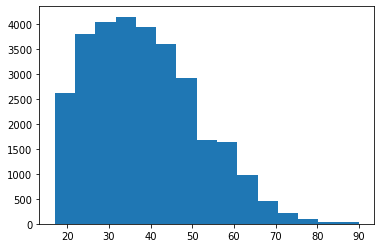

In [69]:
# plotting the distribution to have a good understanding of the age column
plt.hist(df['age'], bins = 15)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac91686140>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac916866e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac91685e70>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac91686c80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac91686f50>],
 'means': []}

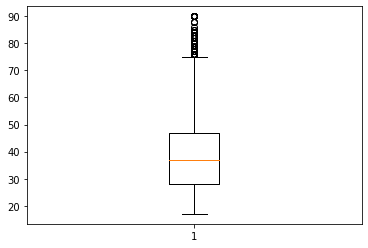

In [70]:
# plotting the box plot to have a good understanding of the age column
plt.boxplot(df['age'])

We can see from the histogram and boxplot above that the AGE column is right-skewed with quite a number of outliers.Let's find out in numbers how many fall below the median and how many are outliers. We are avoiding making analysis with the mean here because the data is skewed and as such will not give the right assessment of the AGE column.

In [73]:
# Useful parameters
age_first_quartile = 28.0
age_second_quartile = 37.0
age_third_quartile = 47.0
age_mean = 38.437902
age_IQR = age_third_quartile -  age_first_quartile
age_outlier_range = age_third_quartile + (1.5 * age_IQR)
print(age_outlier_range)

75.5


In [74]:
# Accessing number of people with age below the mean_ge
len(df.loc[df['age'] < age_mean])

16209

In [75]:
# Accessing number of people with age below the median_age
len(df.loc[df['age'] < age_second_quartile])

14590

In [76]:
# Accessing number of people who are outliers with regards to their age
len(df.loc[df['age'] > age_outlier_range])

169

<AxesSubplot:>

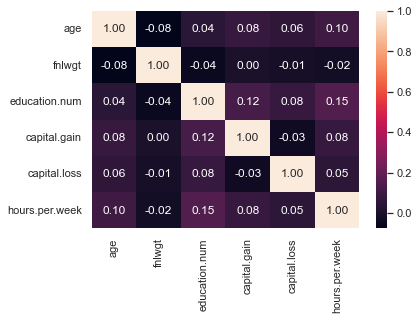

In [77]:
sns.set()
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [48]:
import sklearn.utils
data_df = sklearn.utils.shuffle(data_df)
data_df = data_df.reset_index(drop= True )
data_df.shape
data_df.income.value_counts()

<=50K    8000
>50K     7508
Name: income, dtype: int64

In [49]:
#code to remove irrelivant columns
data_df =data_df.drop(columns=['fnlwgt','education' , 'age','sex','race','native.country','relationship','marital.status','occupation'])

In [50]:
X = data_df.drop(columns= 'income' )
y =data_df['income']

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3 , random_state= 0 )
y_train.value_counts()

<=50K    5640
>50K     5215
Name: income, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_train.workclass = encoder.fit_transform(x_train.workclass)
x_test.workclass = encoder.transform(x_test.workclass)

In [55]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 1 )
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(x_train_balanced.drop(columns=[ 'workclass' ]))
normalised_train_df = pd.DataFrame(normalised_train_df,
columns=x_train_balanced.drop(columns=[ 'workclass' ]).columns)
normalised_train_df[ 'workclass' ] = x_train_balanced[ 'workclass' ]

In [57]:
x_test = x_test.reset_index(drop= True )
normalised_test_df = scaler.transform(x_test.drop(columns=['workclass']))
normalised_test_df = pd.DataFrame(normalised_test_df,
columns=x_test.drop(columns=[ 'workclass']).columns)
normalised_test_df['workclass'] = x_test['workclass']

In [58]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
l=log_reg.fit(normalised_train_df, y_balanced)

In [59]:
l

LogisticRegression()

In [60]:
#code to find the percentage accuacy on train data set
train_accuracy=l.score(normalised_train_df, y_balanced)
print('The accuracy on the train set is {} percent'.format(train_accuracy*100))

The accuracy on the train set is 71.2677304964539 percent


In [61]:
y_pred = l.predict(normalised_test_df)

In [62]:
#code to find the percentage accuacy on test data set
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix,classification_report
test_accuracy=accuracy_score(y_test, y_pred)
print('The accuracy on the test data set is :{} percent'.format(round(test_accuracy*100),2))

The accuracy on the test data set is :72 percent


In [63]:
precision = precision_score(y_test, y_pred, pos_label='<=50K')
print('the precision on the data set for less than 50k is : {} percent'.format(round(precision*100), 2))

the precision on the data set for less than 50k is : 71 percent


In [64]:
precision = precision_score(y_test, y_pred, pos_label='>50K')
print('the precision on the data set for more than 50k is : {} percent'.format(round(precision*100), 2))

the precision on the data set for more than 50k is : 72 percent


In [65]:
recall = recall_score(y_test, y_pred, pos_label='<=50K')
print('The Recall for less than 50k is : {} percent'.format(round(recall*100), 2))

The Recall for less than 50k is : 75 percent


In [66]:
recall = recall_score(y_test, y_pred, pos_label='>50K')
print('The Recall for more than 50k is : {} percent'.format(round(recall*100), 2))

The Recall for more than 50k is : 68 percent


In [67]:
#summary
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.71      0.75      0.73      2360
        >50K       0.72      0.68      0.70      2293

    accuracy                           0.72      4653
   macro avg       0.72      0.71      0.71      4653
weighted avg       0.72      0.72      0.71      4653



Text(0.5, 33.0, 'predicted values')

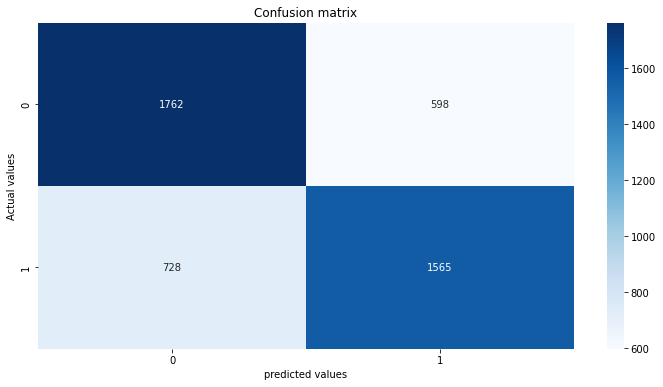

In [68]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title('Confusion matrix')
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.ylabel('Actual values')
plt.xlabel('predicted values')


## CONCLUSION
#### 1.The model responded well with an accuracy of 74 percent
#### 2.The chance of a person earning over 50k dollars per year is almost the same as earning less than 50k dollars since the percentage is 71 and 72 respectively